In [45]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function, division
from builtins import range
from scipy.stats import beta

In [38]:
class Variant:
    def __init__(self, p):
        self.p = p
        self.N = 0

    def pull(self):
        return np.random.random() < self.p

    def update(self, result_of_pull):
        pass

In [39]:
class EpsilonGreedyVariant(Variant):
    def __init__(self, p):
        super().__init__(p)
        self.estimated_p = 0

    def update(self, result_of_pull):
        sum = self.estimated_p * self.N + result_of_pull
        self.N += 1
        self.estimated_p = sum / self.N

In [48]:
def epsilon_greedy_simulation(numb_of_trials, epsilon, bandit_probabilities):
    
    variants = [EpsilonGreedyVariant(p) for p in bandit_probabilities]

    numb_of_exploits = 0
    numb_of_explores = 0
    rewards = np.zeros(numb_of_trials)
    num_optimal = 0
    optimal_j = np.argmax([variant.p for variant in variants])

    print("Optimal j:", optimal_j)

    for i in range (numb_of_trials):
        
        if np.random.random() < epsilon:
            numb_of_explores += 1
            chosen_bandit_index = np.random.randint(low=0, high=3)
        else:
            numb_of_exploits += 1
            chosen_bandit_index = np.argmax([variant.estimated_p for variant in variants])
        
        if chosen_bandit_index == optimal_j:
            num_optimal += 1

        chosen_bandit = variants[chosen_bandit_index]

        result_of_pull = chosen_bandit.pull()
        rewards[i] = result_of_pull
        chosen_bandit.update(result_of_pull)

    ## Stats
    print(f"Optimal Run Percentage: {(num_optimal / numb_of_trials * 100):.2f}%")
    print(f"Percentage of Exploit: {(numb_of_exploits / (numb_of_exploits+numb_of_explores))*100}%")
    print("Bandits' P Estimates:", [variant.estimated_p for variant in variants])
    print("Reward Percentage: ", rewards.sum() / numb_of_trials)

    ## Plots
    cumulative_rewards = np.cumsum(rewards)
    win_rates = cumulative_rewards / (np.arange(numb_of_trials) + 1)
    plt.plot(win_rates, label="Algorithm Win Rate")
    plt.plot(np.ones(numb_of_trials)*np.max(bandit_probabilities), label="Best Performing Win Rate")
    plt.legend()
    plt.title("Win Rates over Trials")
    plt.xlabel("Trials")
    plt.ylabel("Win Rate")
    plt.show()

Optimal j: 2
Optimal Run Percentage: 92.39%
Percentage of Exploit: 90.03%
Bandits' P Estimates: [0.19346049046321537, 0.5329949238578676, 0.7528953349929636]
Reward Percentage:  0.7237


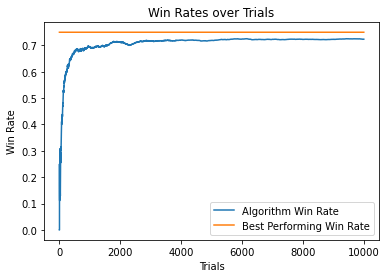

In [49]:
epsilon_greedy_simulation(numb_of_trials=10_000, epsilon=0.1, bandit_probabilities=[0.25, 0.5, 0.75])

In [50]:
class OptimisticInitialValueVariant(Variant):
    def __init__(self, p):
        super().__init__(p)
        self.N = 1
        self.estimated_p = 5

    def update(self, result_of_pull):
        sum = self.estimated_p * self.N + result_of_pull
        self.N += 1
        self.estimated_p = sum / self.N

In [57]:
def optimistic_initial_value_simulation(numb_of_trials, bandit_probabilities):
    variants = [OptimisticInitialValueVariant(p) for p in bandit_probabilities]

    rewards = np.zeros(numb_of_trials)
    num_optimal = 0
    optimal_j = np.argmax([variant.p for variant in variants])

    print("Optimal j:", optimal_j)

    for i in range (numb_of_trials):
        
        chosen_bandit_index = np.argmax([variant.estimated_p for variant in variants])
        
        if chosen_bandit_index == optimal_j:
            num_optimal += 1

        chosen_bandit = variants[chosen_bandit_index]

        result_of_pull = chosen_bandit.pull()
        rewards[i] = result_of_pull
        chosen_bandit.update(result_of_pull)

    ## Stats
    print(f"Optimal Run Percentage: {(num_optimal / numb_of_trials * 100):.2f}%")
    print("Bandits' P Estimates:", [variant.estimated_p for variant in variants])
    print("Reward Percentage: ", rewards.sum() / numb_of_trials)

    ## Plots
    cumulative_rewards = np.cumsum(rewards)
    win_rates = cumulative_rewards / (np.arange(numb_of_trials) + 1)
    plt.plot(win_rates, label="Algorithm Win Rate")
    plt.plot(np.ones(numb_of_trials)*np.max(bandit_probabilities), label="Best Performing Win Rate")
    plt.legend()
    plt.title("Win Rates over Trials")
    plt.xlabel("Trials")
    plt.ylabel("Win Rate")
    plt.show()

Optimal j: 2
Optimal Run Percentage: 99.66%
Bandits' P Estimates: [0.6666666666666666, 0.7037037037037037, 0.7551921340423395]
Reward Percentage:  0.7537


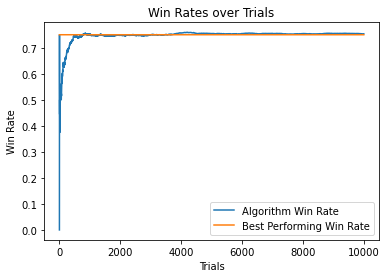

In [58]:
optimistic_initial_value_simulation(numb_of_trials=10_000, bandit_probabilities=[0.25, 0.5, 0.75])

In [60]:
class UCB1(Variant):
    def __init__(self, p):
        super().__init__(p)
        self.estimated_p = 0

    def update(self, result_of_pull):
        sum = self.estimated_p * self.N + result_of_pull
        self.N += 1
        self.estimated_p = sum / self.N   

In [61]:
def ucb1_simulation(numb_of_trials=10_000, bandit_probabilities=[0.25, 0.5, 0.75]):
    variants = [UCB1(p) for p in bandit_probabilities]

    rewards = np.zeros(numb_of_trials)
    num_optimal = 0
    optimal_j = np.argmax([variant.p for variant in variants])

    print("Optimal j:", optimal_j)

    #initilization of bandits
    for i in range(3):

        chosen_bandit = variants[i]

        result_of_pull = chosen_bandit.pull()
        rewards[i] = result_of_pull
        chosen_bandit.update(result_of_pull)

    for i in range (3, numb_of_trials):
        
        chosen_bandit_index = np.argmax([(variant.estimated_p + np.sqrt(2 * np.log(i) / variant.N)) for variant in variants])
        
        if chosen_bandit_index == optimal_j:
            num_optimal += 1

        chosen_bandit = variants[chosen_bandit_index]

        result_of_pull = chosen_bandit.pull()
        rewards[i] = result_of_pull
        chosen_bandit.update(result_of_pull)

    ## Stats
    print(f"Optimal Run Percentage: {(num_optimal / numb_of_trials * 100):.2f}%")
    print("Bandits' P Estimates:", [variant.estimated_p for variant in variants])
    print("Reward Percentage: ", rewards.sum() / numb_of_trials)

    ## Plots
    cumulative_rewards = np.cumsum(rewards)
    win_rates = cumulative_rewards / (np.arange(numb_of_trials) + 1)
    plt.plot(win_rates, label="Algorithm Win Rate")
    plt.plot(np.ones(numb_of_trials)*np.max(bandit_probabilities), label="Best Performing Win Rate")
    plt.legend()
    plt.title("Win Rates over Trials")
    plt.xlabel("Trials")
    plt.ylabel("Win Rate")
    plt.show()

Optimal j: 2
Optimal Run Percentage: 96.54%
Bandits' P Estimates: [0.25, 0.5302491103202847, 0.7456240290005169]
Reward Percentage:  0.7364


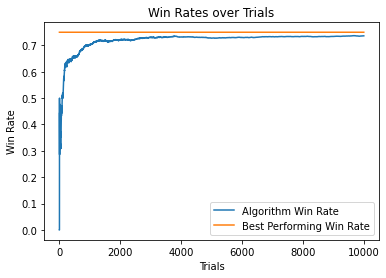

In [62]:
ucb1_simulation(numb_of_trials=10_000, bandit_probabilities=[0.25, 0.5, 0.75])

In [63]:
class Bayesian(Variant):
    def __init__(self, p):
        super().__init__(p)
        self.a = 1
        self.b = 1

    def update(self, result_of_pull):
        self.N += 1
        self.a += result_of_pull
        self.b += 1 - result_of_pull

In [66]:
def bayesian_experiment(numb_of_trials=10_000, bandit_probabilities=[0.25, 0.5, 0.75]):
    variants = [Bayesian(p) for p in bandit_probabilities]

    rewards = np.zeros(numb_of_trials)
    num_optimal = 0
    optimal_j = np.argmax([variant.p for variant in variants])

    print("Optimal j:", optimal_j)

    for i in range (numb_of_trials):
        
        chosen_bandit_index = np.argmax([beta.rvs(variant.a, variant.b, size=1) for variant in variants])
        
        if chosen_bandit_index == optimal_j:
            num_optimal += 1

        chosen_bandit = variants[chosen_bandit_index]

        result_of_pull = chosen_bandit.pull()
        rewards[i] = result_of_pull
        chosen_bandit.update(result_of_pull)

    ## Stats
    print(f"Optimal Run Percentage: {(num_optimal / numb_of_trials * 100):.2f}%")
    print("Bandits' Parameters' Estimates:", [(variant.a, variant.b) for variant in variants])
    print("Reward Percentage: ", rewards.sum() / numb_of_trials)

    ## Plots
    x = np.linspace(0, 1, 200)
    for b in variants:
        y = beta.pdf(x, b.a, b.b)
        plt.plot(x, y, label=f"Real p: {b.p:.4f}, Win Rate = {b.a-1}/{b.N}")
    
    plt.title(f"Bandit distributions after {numb_of_trials} trials")
    plt.legend()
    plt.show()

Optimal j: 2
Optimal Run Percentage: 99.64%
Bandits' Parameters' Estimates: [(5, 12), (9, 14), (7463, 2503)]
Reward Percentage:  0.7474


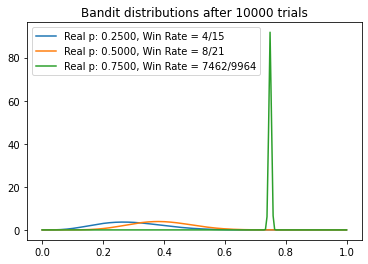

In [67]:
bayesian_experiment(numb_of_trials=10_000, bandit_probabilities=[0.25, 0.5, 0.75])